In [11]:
"""
ch_2_mlp_basic_nn.py 

Goes over doing a multiclass classification on images from cifar10 dataset

Good example to cover the basics of: flatten layer, dense layer, activation functions, loss functions, optimizer functions, and building a multilayer network (NN) to solve a problem
"""
import numpy as np
from tensorflow.keras import datasets, utils, layers, models, optimizers
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# location to cache the model weights
model_file = "weights/ch_2_mlp_basic_nn_model_weights.h5"

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

NUM_CLASSES = 10

# Q: What's this do?
# A: Each pixel is a 1-255 value (RGB). By dividing by 255, we scale these values to the range [0, 1]. 
#    This is a common preprocessing step since neural networks tend to perform better with input data that is on a smaller scale.

x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

# Q: What's this do?
"""
  A:
The function utils.to_categorical is used to convert the class labels (which are integers) into a one-hot encoded format. 

Instead of representing the class as a single integer, it is represented as a binary vector that is all zeros except for the index of the class, which is marked with a one.

For example, if we have 10 classes and a particular image belongs to class 2, the one-hot encoded label would be a vector where all elements are 0 except for the third element (since we start counting from 0), which would be 1.

Let's say we have 10 classes, which means any given image can belong to one of these 10 classes, numbered from 0 to 9. If an image belongs to class 2, in one-hot encoding, we would represent this as a vector with 10 elements, where each element corresponds to a class. All elements will be set to 0, except for the one that corresponds to class 2, which will be set to 1.

Classes:    0  1  2  3  4  5  6  7  8  9
Vector:    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

"""

y_train = utils.to_categorical(y_train, NUM_CLASSES) 
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [12]:
# Q: What's a "dense" layer?
# A: aka "fully connected" layer
#    every neuron in this layer is connected to every neuron in the previous layer
# 
#    equation:
#    layer output = activation(W * input + b)
#    
#    where (W) is the weight matrix, b is the bias vector, activation is the activation function

# Q: What's a "flatten" layer?
# A: convert a multi-dimensional input into a one-dimensional array

# Q: How large is the 1d array (vector) produced from "flatten"?
# A: array size is 3,072 (= 32 × 32 × 3).

# Q: What does a "relu" function look like?
#         /
# A: ____/
#        0

# Q: What does a "softmax" function look like?
#            _____
#           /
#          /
#         /
# A: ____/
#           0
#   "a gentle rise around zero"
#
#   note: all activation functions are to introduce non linearity -> either/or case

# Q: What does the 200, 150, 10 mean here?
# A: The numbers 200, 150, and 10 refer to the number of neurons in the respective layers of the neural network defined in the code snippet.
#    The last layer must have as many neurons as there are classes in the classification task, which is why it has 10 neurons in this case.
# 
#    shape of our Input layer matches the shape of x_train and the shape of our Dense output layer matches the shape of y_train.

# Q: Whats the 32, 32, 3?
"""
A: input_shape is the input of each item sent in for training. the shape 1 image. 

Here's a breakdown of the input shape:

The first 32 refers to the height of the input images in pixels.
The second 32 refers to the width of the input images in pixels.
The 3 refers to the number of color channels in the input images. For RGB images, which are common in image processing, there are 3 channels representing red, green, and blue.

cifar10 is a set of color images in 32x32 pixel size. 

also Flatten(input_shape=(32, 32, 3)) will also produce an "input" layer that takes in inputs of shape "input_shape", then this is fed into the Flatten layer to flatten into a 1D vector.
"""

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

In [13]:
# Params is the number of weigths in each layer

# Q: what happens if we remove one of the dense layers? will it still work? will it work better/worse?

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# amount to adjust the weights during each step (gradient descent)
opt = optimizers.Adam(learning_rate=0.0005)

# loss function: categorical_crossentropy, root mean squared etc
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [15]:
# training time!

# ends with about a ~50% accuracy, on a 10 class classification random guess is 1/10 or 10% so alright
# model.fit(x_train 
#           , y_train 
#           , batch_size = 32 
#           , epochs = 10 
#           , shuffle = True 
#           )

# updated the code slightly to cache the model's trained weights
if os.path.exists(model_file):
    # Load the pre-trained model
    model = load_model(model_file)
    print("Loaded saved model from disk.")
else:
    # Train the model because it hasn't been trained yet
    print("Training the model...")
    model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)
    
    # Save the model for future use
    model.save(model_file)
    print(f"Model saved to {model_file}.")

Loaded saved model from disk.


In [16]:
# after training it maintains ~50% accuracy on test images
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.4905 - loss: 1.4407


[1.439695119857788, 0.48989999294281006]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


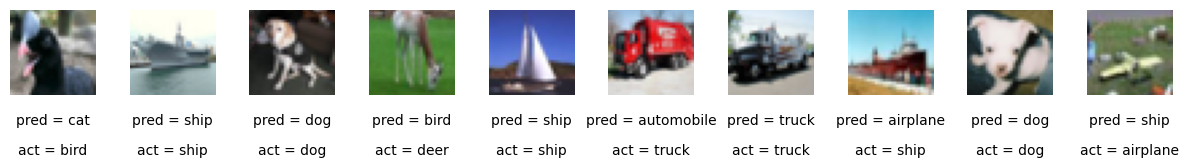

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) 
preds_single = CLASSES[np.argmax(preds, axis = -1)] 
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)